 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_path = Path ('./Resources/whale_returns.csv')
# read and format dates and set index on date
whale_df = pd.read_csv(whale_path, parse_dates = True, infer_datetime_format =True, index_col=0)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [29]:
# Drop nulls
# drop the  and test to make sure all nulls are gone
whale_df.dropna(inplace=True)
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [30]:
# Reading algorithmic returns
algo_path = Path('./Resources/algo_returns.csv')
# read and format dates and set index on date
algo_returns_df = pd.read_csv(algo_path, parse_dates=True, infer_datetime_format=True, index_col = 'Date')

In [31]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [32]:
# Drop nulls
# drop the  and test to make sure all nulls are gone
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [33]:
# Reading S&P 500 Closing Prices
sp_path = Path('./Resources/sp500_history.csv')
# read and format dates and set index on date
SP500_df = pd.read_csv(sp_path, parse_dates=True, infer_datetime_format = True, index_col = 'Date')

In [34]:
# check datatype for other two dataframes
print (f'whale dtypes: {whale_df.dtypes}\n')
print (f'algo dtypes: {algo_returns_df.dtypes}')

whale dtypes: SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

algo dtypes: Algo 1    float64
Algo 2    float64
dtype: object


In [35]:
# Check Data Types
SP500_df.dtypes

Close    object
dtype: object

In [36]:
# Fix Data Types
# remove '$' and then convert to float
# test = SP500_df.copy()
SP500_df['Close'] = SP500_df['Close'].str.replace('$', '').astype(float)
# test['Close']= test ['Close'].astype(float)
# and check it's data types
SP500_df.dtypes

C:\Users\Hassan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Close    float64
dtype: object

In [37]:
# Calculate Daily Returns
# sort
SP500_df.sort_index(inplace=True)
# and remove nulls
SP_daily_ret = SP500_df.pct_change().dropna()
SP_daily_ret.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [129]:
# Drop nulls
# hassan's note: done before

In [38]:
# Rename `Close` Column to be specific to this portfolio.
SP_daily_ret.columns = ['SP500']
SP_daily_ret.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [41]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_returns_df, SP_daily_ret], axis = 'columns', join='inner' )
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

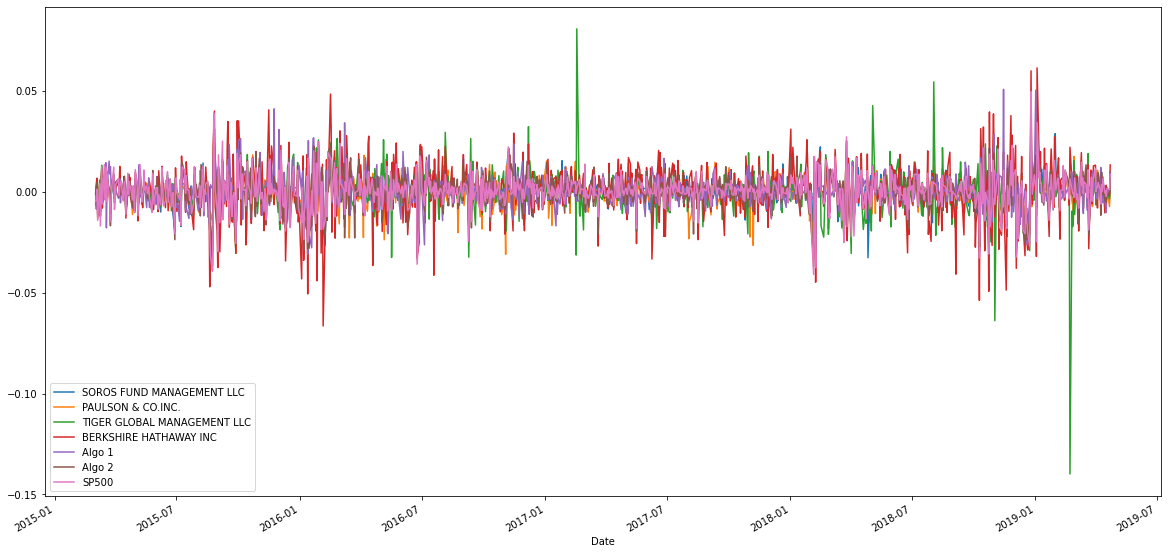

In [42]:
# Plot daily returns of all portfolios
# get column header names 
col_names = combined_df.columns
combined_df.plot ( y = col_names, figsize= (20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

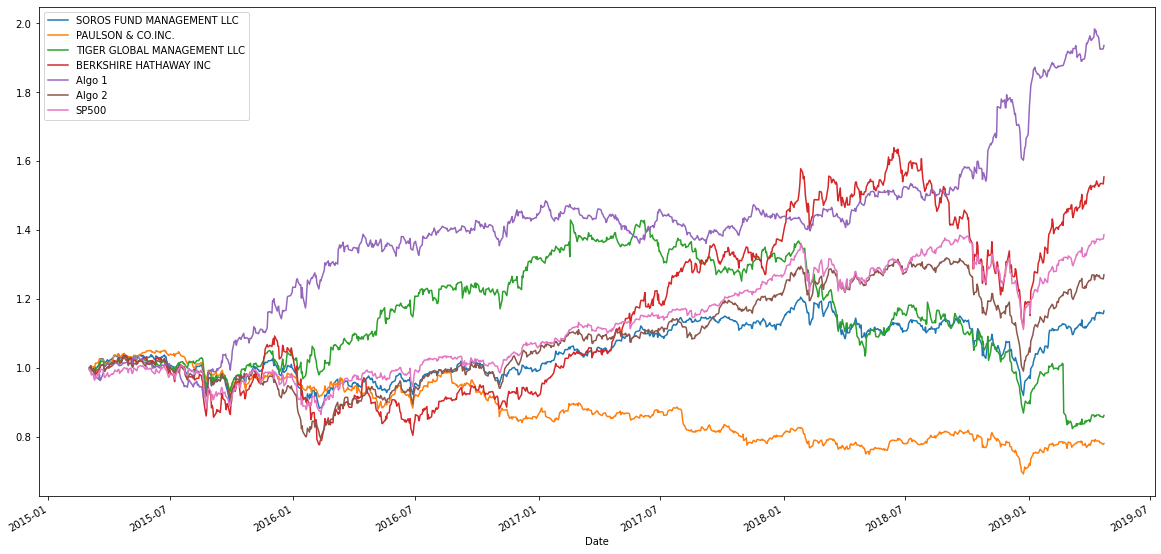

In [43]:
# Calculate cumulative returns of all portfolios
cum_prod = (1+combined_df).cumprod()
cum_prod.head()
# Plot cumulative returns
cum_prod.plot (y = col_names, figsize= (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

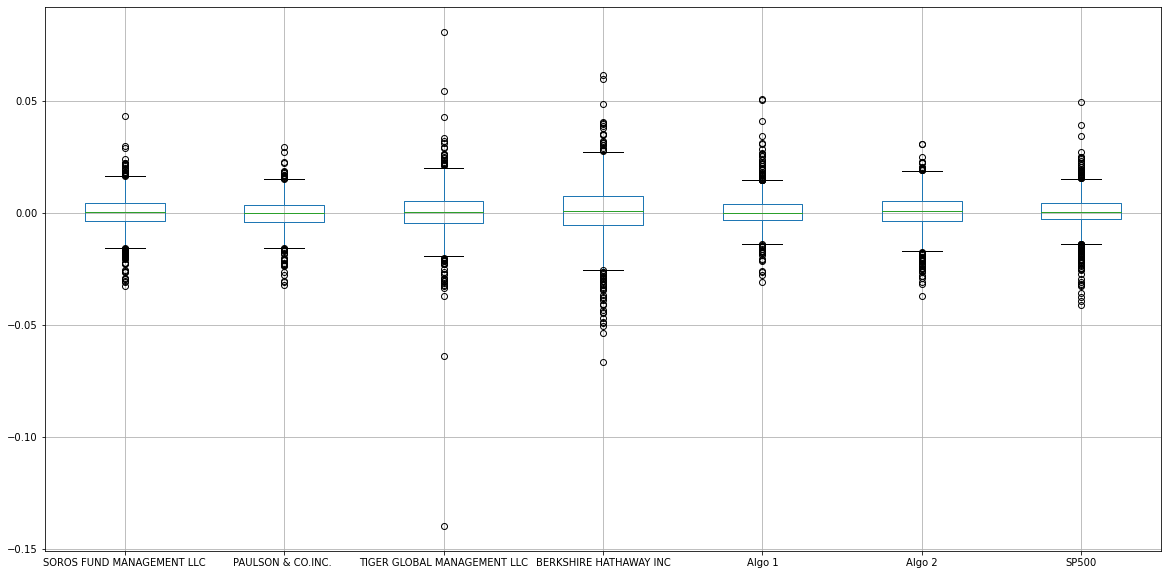

In [44]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20, 10))

### Calculate Standard Deviations

In [45]:
# Calculate the daily standard deviations of all portfolios
port_std = combined_df.std()
port_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [46]:
# Calculate  the daily standard deviation of S&P 500
print(f'all portfolio standard dev: \n {port_std.sort_values()}')
# Determine which portfolios are riskier than the S&P 500
print (f'\n all portfolio risker than SP500: \n {port_std[port_std > port_std["SP500"]]}')

all portfolio standard dev: 
 PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500                          0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

 all portfolio risker than SP500: 
 TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized standard deviation (252 trading days)
# check this
import math
print(f'annualized standard dev: \n{port_std * math.sqrt(252)}')
# print (f'annualize standev: {port_std*sqrt(252)}')

annualized standard dev: 
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

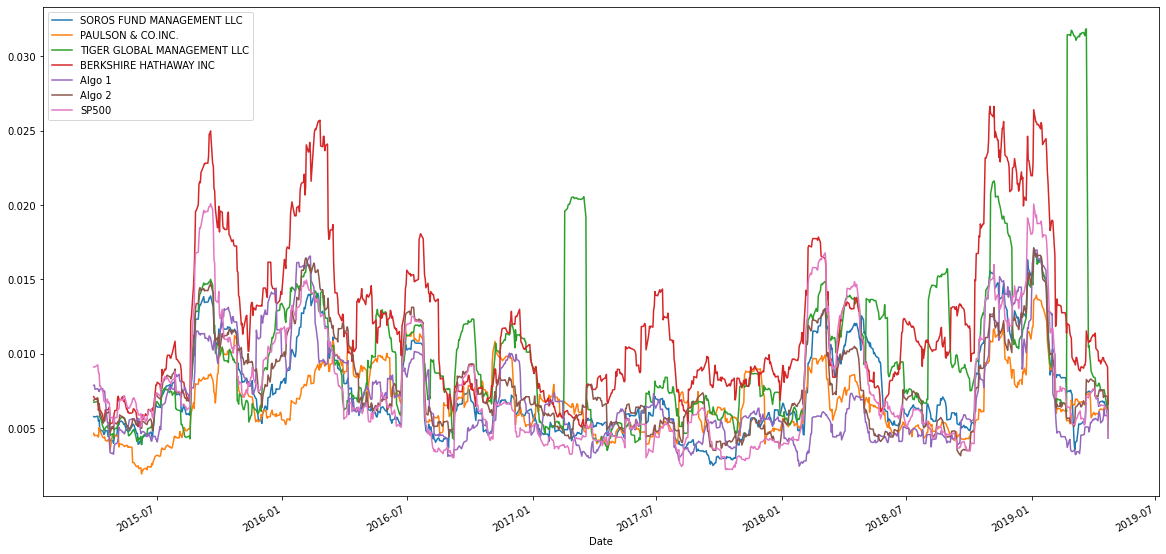

In [48]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_stddv = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_stddv.plot(figsize = (20, 10))

### Calculate and plot the correlation

correlation matrix 
 
                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
SP500                                         0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164

<AxesSubplot:>

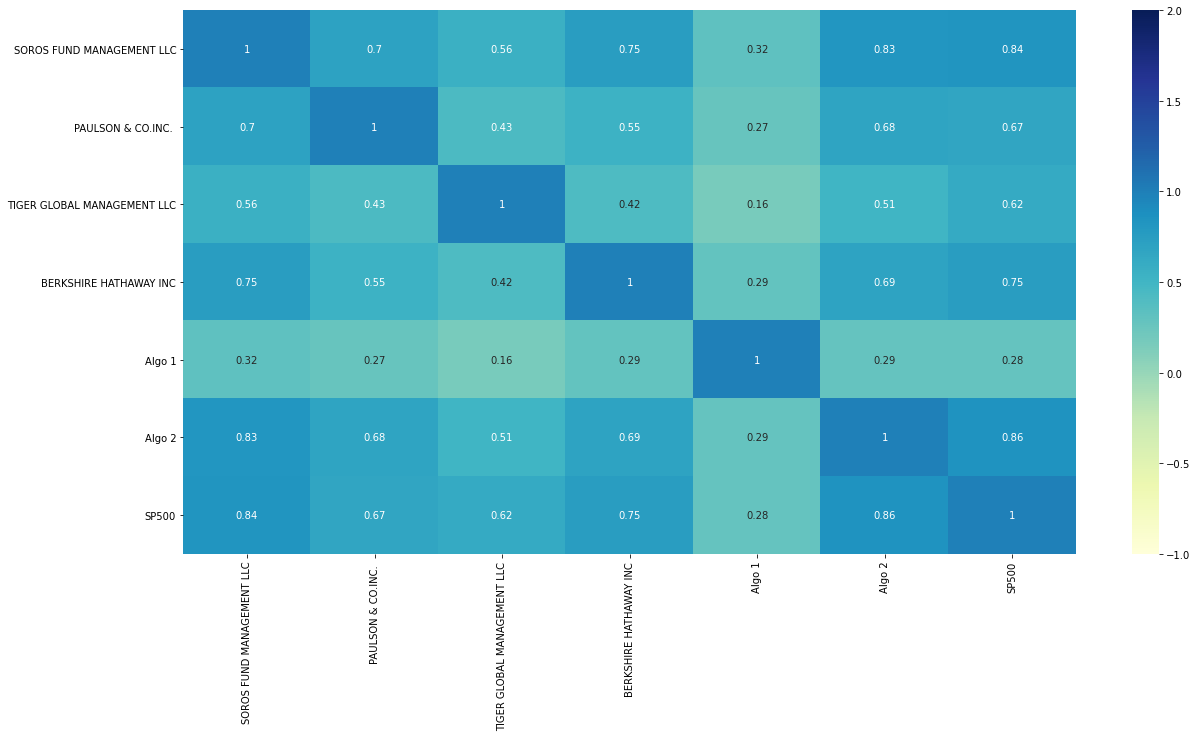

In [49]:
# import seaborn
import seaborn as sns

# Calculate the correlation
print (f'correlation matrix \n \n{combined_df.corr()}')

# Display de correlation matrix

import matplotlib.pyplot as plt
fix, ax = plt.subplots (figsize = (20, 10))
sns.heatmap(combined_df.corr(), annot=True, vmin = -1, vmax=2, cmap="YlGnBu", ax = ax)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Covariance of Algo 1 with S&P500: 1.821774999163274e-05

Variance of S&P500: 7.316632424648712e-05

Beta  of Algo 1: 0.24899091459425635



<AxesSubplot:title={'center':'21 Day Rolling Beta Algo 1'}, xlabel='Date'>

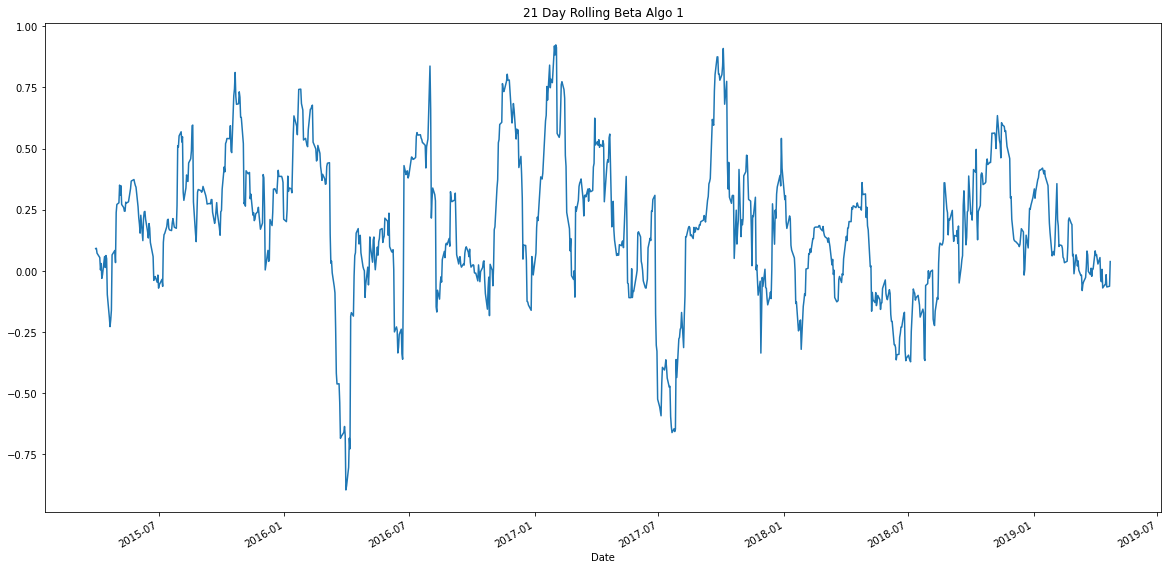

In [50]:
# Calculate covariance of a single portfolio
# note to self pic a different one. This flat lines.
Algo1_cov = combined_df['Algo 1'].cov(combined_df['SP500'])
print (f'Covariance of Algo 1 with S&P500: {Algo1_cov}\n')

# Calculate variance of S&P 500
SP500_var = combined_df["SP500"].var()
print (f'Variance of S&P500: {SP500_var}\n')

# Computing beta

Algo1_beta = Algo1_cov/SP500_var
print (f'Beta  of Algo 1: {Algo1_beta}\n')

# Plot beta trend
# calcualte rolling covariance
Algo1_21_cov = combined_df['Algo 1'].rolling (window=21).cov(combined_df['SP500'].rolling(window=21))
# calcualte rolling variance
SP500_rolling21_var  = combined_df["SP500"].rolling (window=21).var()
# calcualte Algo 21 day rolling beta
Algo1_21_beta = Algo1_21_cov/SP500_rolling21_var
Algo1_21_beta.plot(figsize = (20,10), title = '21 Day Rolling Beta Algo 1')
# Algo1_21_cov.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [141]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Annualized Sharpe Ratios
annual_shrpe_ratio = (combined_df.mean() * 252)/(combined_df.std() * np.sqrt (252))
# sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
print (f'Annualized Sharpe Ratios are:\n {annual_shrpe_ratio}')

Annualized Sharpe Ratios are:
 SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64


In [52]:
annual_shrpe_ratio.index.to_list()

['SOROS FUND MANAGEMENT LLC',
 'PAULSON & CO.INC. ',
 'TIGER GLOBAL MANAGEMENT LLC',
 'BERKSHIRE HATHAWAY INC',
 'Algo 1',
 'Algo 2',
 'SP500']

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

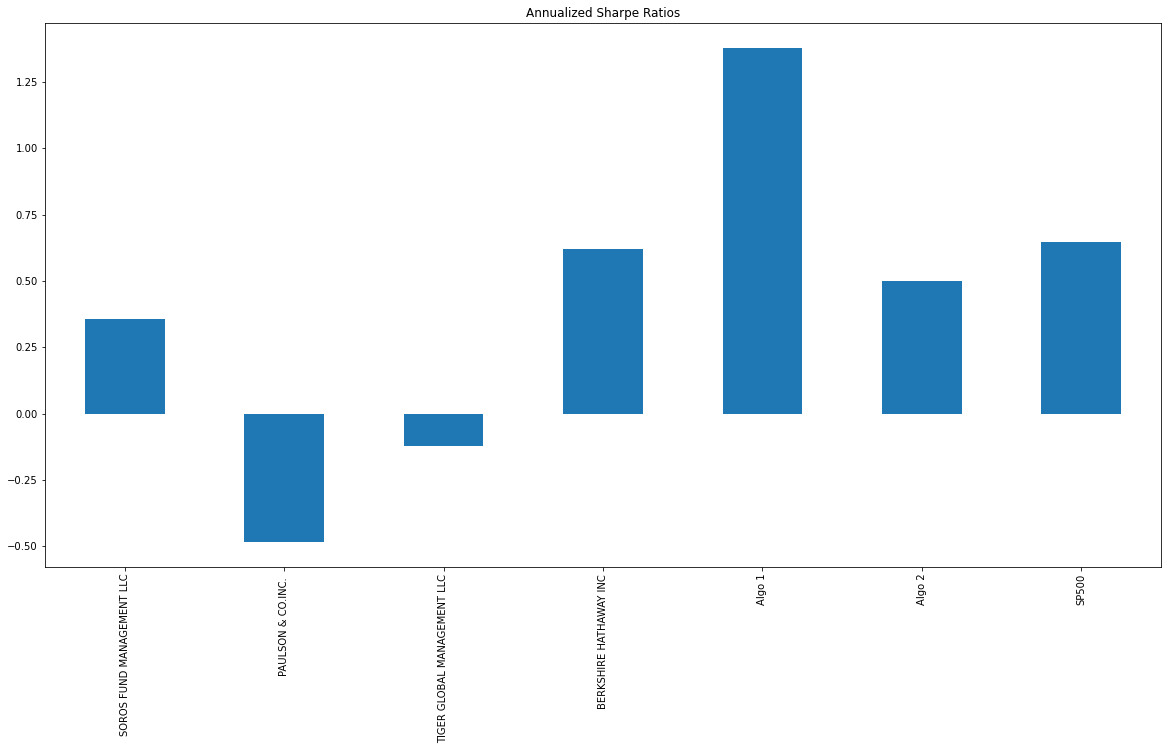

In [53]:
# Visualize the sharpe ratios as a bar plot
annual_shrpe_ratio.plot.bar(figsize = (20,10), title = 'Annualized Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Answer written by code

In [54]:
# create a function to print out a list of portfolio sharpe ratios with others

# function to compare one fund with other funds using shapre ratio 
def print_shrp_ratio_comparision(in_shrp_ratios, in_compare_fund, in_trg_funds):
    #in_sharpe ratio series frame of portfolios for set of funds with all other fund   
    #in_compare_fund name of to be compared
    for trgt_fund in in_trg_funds:
        if in_shrp_ratios[in_compare_fund] > in_shrp_ratios [trgt_fund]:
            print (f'{in_compare_fund} better than {trgt_fund} \n')
        elif in_shrp_ratios[in_compare_fund] < in_shrp_ratios [trgt_fund]:
            print (f'{in_compare_fund} worse than {trgt_fund} \n')
        else:
            print (f'{in_compare_fund} same as {trgt_fund} \n')


def compare_sharpe (in_shrp_ratios, in_comparefunds):
    #in_sharpe ratio series of portfolios for set of funds with all other fund
    #in_comparefunds column headers funds to compare with
    
    #create a list of target funds (all funds minus compare funds)
    all_funds = in_shrp_ratios.index.to_list() #create list of all funds
    trgt_funds = list (set (all_funds) - set (in_comparefunds)) # use set operation to create differece in list - dont need ordered list    
   
    #loop through compare list
    for cur_fund in in_comparefunds:
        print_shrp_ratio_comparision(in_shrp_ratios, cur_fund, trgt_funds)


compare_sharpe (annual_shrpe_ratio, ['Algo 1', 'Algo 2'])
        

Algo 1 better than TIGER GLOBAL MANAGEMENT LLC 

Algo 1 better than SOROS FUND MANAGEMENT LLC 

Algo 1 better than SP500 

Algo 1 better than BERKSHIRE HATHAWAY INC 

Algo 1 better than PAULSON & CO.INC.  

Algo 2 better than TIGER GLOBAL MANAGEMENT LLC 

Algo 2 better than SOROS FUND MANAGEMENT LLC 

Algo 2 worse than SP500 

Algo 2 worse than BERKSHIRE HATHAWAY INC 

Algo 2 better than PAULSON & CO.INC.  



---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

## Hassan Note: reading file from Excel with 3 tabs with ticker names and put in a list of dataframes
## advangate fo this approach is it can read an arbitary list of companies 

## use for loop to read all tabs

In [55]:
# Reading data from 1st stock
# set up path
goog_path = Path ('./Resources/goog_historical.csv')
# read into dataframe
goog_df = pd.read_csv(goog_path, infer_datetime_format=True, parse_dates = True,index_col=1)
# check data.
goog_df.sample(5)

,Symbol,NOCP
Trade DATE,,
2018-12-27,GOOG,1043.88
2018-11-27,GOOG,1044.41
2019-01-02,GOOG,1045.85
2018-09-25,GOOG,1184.65
2019-02-25,GOOG,1109.40


In [56]:
# Reading data from 2nd stock
# set up path
aapl_path = Path ('./Resources/aapl_historical.csv')
# read into dataframe
aapl_df = pd.read_csv(aapl_path, infer_datetime_format=True, parse_dates = True,index_col=1 )
# check data.
aapl_df.sample(5)

,Symbol,NOCP
Trade DATE,,
2018-08-08,AAPL,207.25
2018-08-20,AAPL,215.46
2018-11-14,AAPL,186.80
2019-03-11,AAPL,178.90
2019-05-06,AAPL,208.48


In [57]:
# Reading data from 3rd stock
# set up path
cost_path = Path ('./Resources/cost_historical.csv')
# read into dataframe
cost_df = pd.read_csv(cost_path, infer_datetime_format=True, parse_dates = True ,index_col=1)
# check data.
cost_df.sample(5)

,Symbol,NOCP
Trade DATE,,
2018-09-21,COST,234.76
2019-03-18,COST,236.59
2019-01-18,COST,213.59
2018-11-07,COST,240.37
2019-03-01,COST,219.44


## concatenate and test


In [58]:
# Combine all stocks in a single DataFrame
# new_stocks_df = pd.concat(df_list, axis = 'columns', join = 'inner' )
# # test
# new_stocks_df.head()
new_stock = pd.concat([goog_df,aapl_df,cost_df], axis = 'columns', join = 'inner' )
# head header on price to make easier concat

# test
new_stock.sample(5)

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-03-14,GOOG,1185.55,AAPL,183.73,COST,233.84
2019-02-06,GOOG,1115.23,AAPL,174.24,COST,211.60
2019-03-28,GOOG,1168.49,AAPL,188.72,COST,241.22
2018-10-30,GOOG,1036.21,AAPL,213.30,COST,227.92
2018-08-22,GOOG,1207.33,AAPL,215.05,COST,229.21


In [153]:
# Reset Date index
# done during reading file

In [59]:
# Reorganize portfolio data by having a column per symbol
# drop the symbol colum

# drop "symbol columns"
new_stock.drop (new_stock.columns[[0, 2, 4]], axis=1, inplace=True)

# rename heads
new_stock.columns = ["GOOG", "AAPL", "COST"]

# test
new_stock.head(5)

,GOOG,AAPL,COST
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [60]:
test = new_stock.copy()
test.dropna(inplace=True)
test.sort_index(inplace= True)
test_port = new_stock.dot([1/3, 1/3, 1/3])
test_ret = test_port.pct_change()
print (f'mean, max, min std {test_ret.mean()} {test_ret.max()} {test_ret.min()} {test_ret.std()}' )
print (test_ret)

mean, max, min std -0.00021501189562281566 0.06226906795213738 -0.058928085088084003 0.01470795809336667
Trade DATE
2019-05-09         NaN
2019-05-08    0.002452
2019-05-07    0.004117
2019-05-06    0.015435
2019-05-03   -0.000201
                ...   
2018-05-17    0.009334
2018-05-16    0.002375
2018-05-15   -0.005114
2018-05-14    0.015796
2018-05-11   -0.001091
Length: 250, dtype: float64


In [156]:
# Calculate daily returns
# sort index to be safe
new_stock.sort_index(inplace=True)
# get percent change and dropnap
new_stock = new_stock.pct_change()

# Drop NAs
# done in previous line

# Display sample data
new_stock

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


In [157]:
new_stock['GOOG'].mean()

0.0003656888812017527

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [158]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
cust_port_ser =new_stock.dot(weights)
# rename it column
# cust_port_df.columns = ['cust_port']

# Display sample data
cust_port_ser.head()
# type(cust_port_df)

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [159]:
# Join your returns DataFrame to the original returns DataFrame

master_port_list_df = pd.concat ([combined_df, cust_port_ser], axis = 'columns', join = 'inner').dropna()
# rneame last column for reaablity

master_port_list_df.columns = [*master_port_list_df.columns[:-1], "cust_port"]
print(len(master_port_list_df.columns))

# test
master_port_list_df.sample(5)


8


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,cust_port
2018-05-24,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,0.002363,0.000751
2019-02-25,-0.002242,-0.003639,-0.009525,0.005358,0.009834,-0.000968,0.000791,0.003308
2018-12-24,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.047250,-0.017517
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001217
2018-11-12,-0.018184,-0.009606,-0.010554,-0.021559,0.007258,-0.015428,0.001484,-0.029966


In [160]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# hassan's note : done in previous step

# check to see if therare no data times
master_port_list_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
cust_port                      0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [161]:
# Calculate the annualized `std`
master_port_list_df.std()

SOROS FUND MANAGEMENT LLC      0.009248
PAULSON & CO.INC.              0.007366
TIGER GLOBAL MANAGEMENT LLC    0.014671
BERKSHIRE HATHAWAY INC         0.015579
Algo 1                         0.008437
Algo 2                         0.008788
SP500                          0.009605
cust_port                      0.013331
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Roll 21 Day Stdev'}>

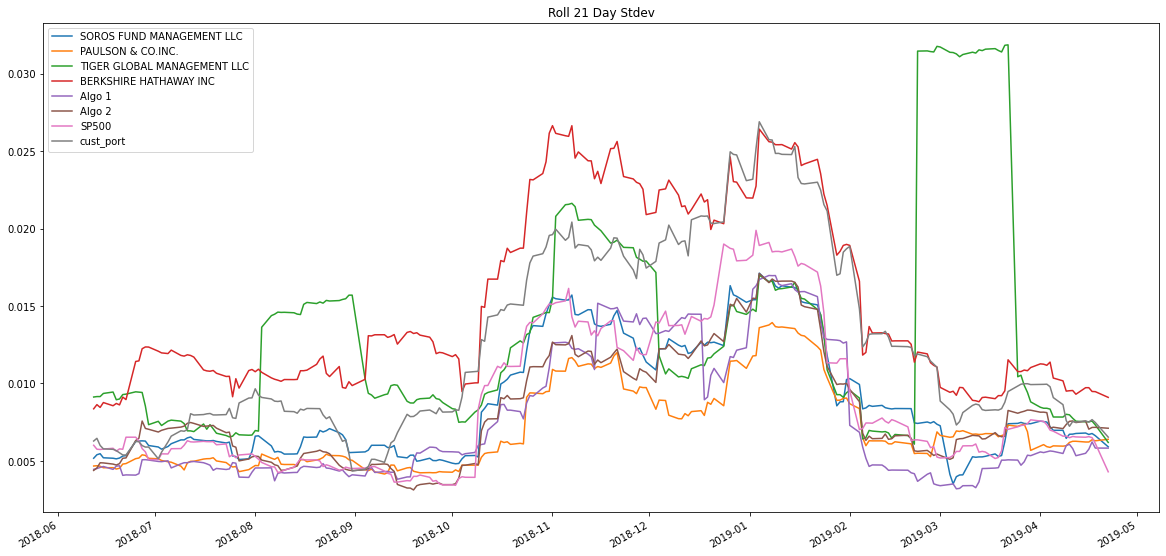

In [162]:
# Calculate rolling standard deviation
twenty_one_day_roll_std = master_port_list_df.rolling(window=21).std()
# Plot rolling standard deviation
twenty_one_day_roll_std.plot(figsize = (20, 10), title = "Roll 21 Day Stdev")

### Calculate and plot the correlation

<AxesSubplot:>

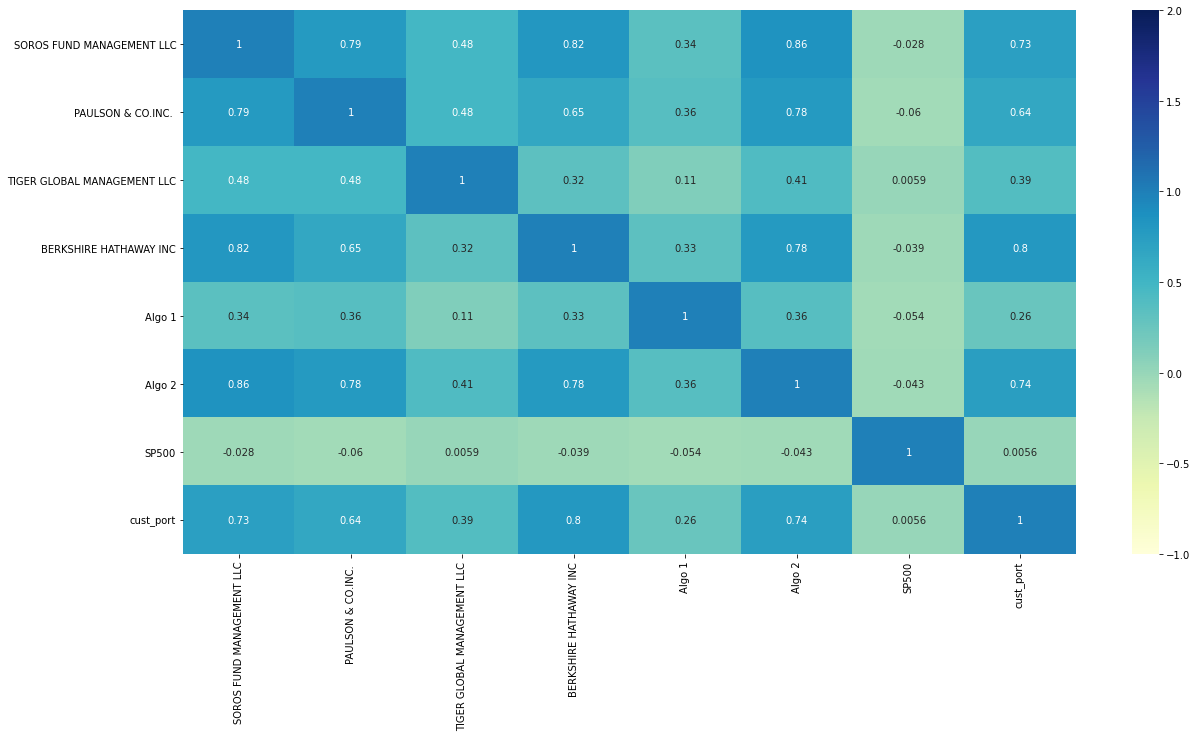

In [163]:
# Calculate and plot the correlation
master_corr = master_port_list_df.corr()

# plot it
fix, ax = plt.subplots (figsize = (20, 10))
sns.heatmap(master_corr, annot=True, vmin = -1, vmax=2, cmap="YlGnBu", ax = ax)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60 day rolling Beta for Custom Portfolio'}>

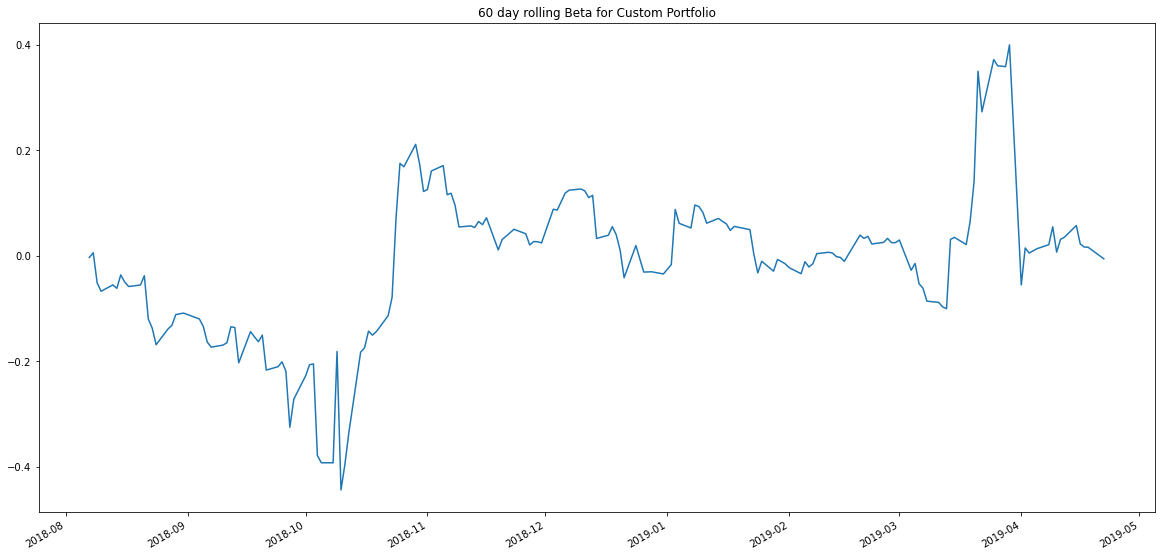

In [164]:
# Calculate and plot Beta
# calcualte 60 day rolling covariance
cust_60_cov = master_port_list_df['cust_port'].rolling(window= 60).cov(master_port_list_df['SP500'].rolling(window=60))
# calculate SP5600 60 day variance
SP500_60_var = master_port_list_df['SP500'].rolling(window=60).var()
# plot i
(cust_60_cov/SP500_60_var).plot(figsize = (20,10), title = '60 day rolling Beta for Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [165]:
# Calculate Annualzied Sharpe Ratios
# Annualized Sharpe Ratios
annual_master_shrpe_ratio = (master_port_list_df.mean() * 252)/(master_port_list_df.std() * np.sqrt (252))
# sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
print (f'Annualized Sharpe Ratios are:\n {annual_master_shrpe_ratio}')

Annualized Sharpe Ratios are:
 SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
SP500                         -0.427676
cust_port                      0.876152
dtype: float64


<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

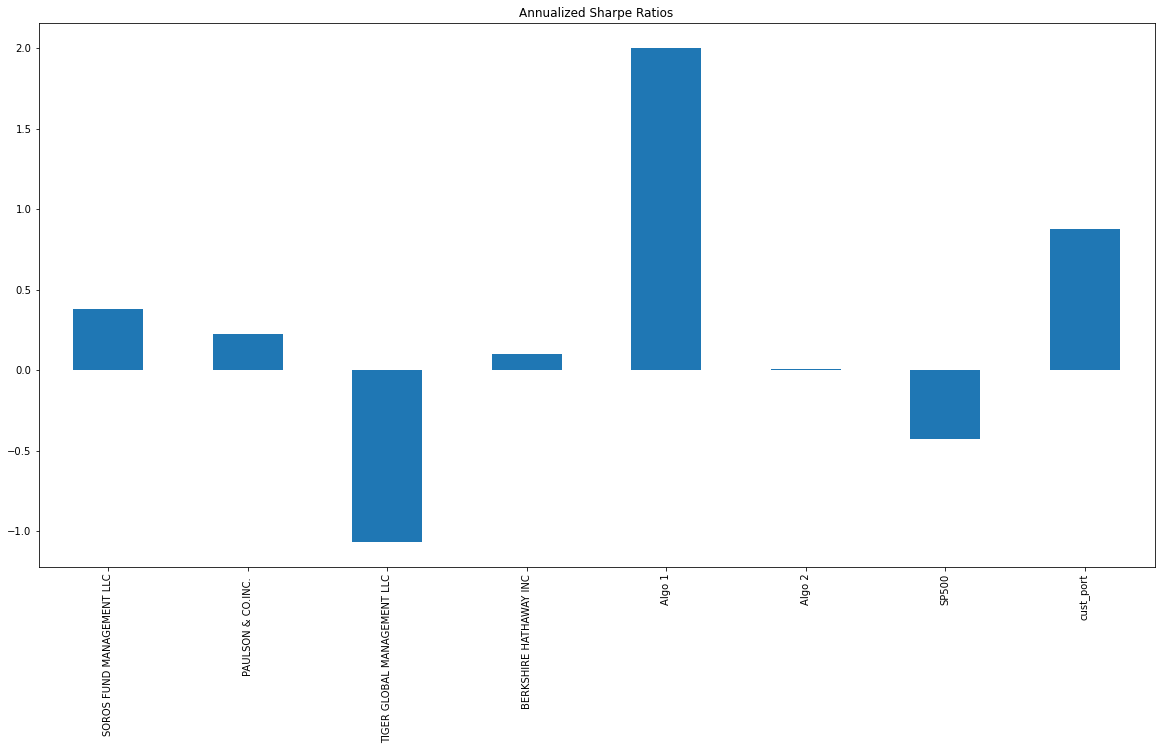

In [166]:
# Visualize the sharpe ratios as a bar plot
annual_master_shrpe_ratio.plot.bar(figsize = (20,10), title = 'Annualized Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

In [169]:
# use prior function to generate results.
compare_sharpe(annual_master_shrpe_ratio, ['cust_port'])

cust_port better than SP500 

cust_port better than PAULSON & CO.INC.  

cust_port worse than Algo 1 

cust_port better than BERKSHIRE HATHAWAY INC 

cust_port better than Algo 2 

cust_port better than SOROS FUND MANAGEMENT LLC 

cust_port better than TIGER GLOBAL MANAGEMENT LLC 

